<a href="https://colab.research.google.com/github/Himanshu069/ML-mini-projects_learning/blob/main/temperature_data(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()
#drive.mount('/content/drive')
df = pd.read_csv('temperature_data.csv')
print(df.head(20))

Saving temperature_data.csv to temperature_data (2).csv
    Time  Temperature    Condition
0      1         34.5  Condition A
1      2         35.1  Condition A
2      3          NaN  Condition A
3      4         36.0  Condition A
4      5         36.2  Condition A
5      6          NaN  Condition A
6      7         37.0  Condition B
7      8         37.5  Condition B
8      9          NaN  Condition B
9     10          NaN  Condition B
10    11         38.3  Condition B
11    12         38.7  Condition B
12    13         39.0  Condition C
13    14         39.5  Condition C
14    15          NaN  Condition C
15    16         40.0  Condition C
16    17          NaN  Condition C
17    18         40.7  Condition C
18    19          NaN  Condition A
19    20         41.5  Condition A


In [ ]:
#print(df['Condition'].isna().sum())
print(df['Temperature'].isna().sum())

56


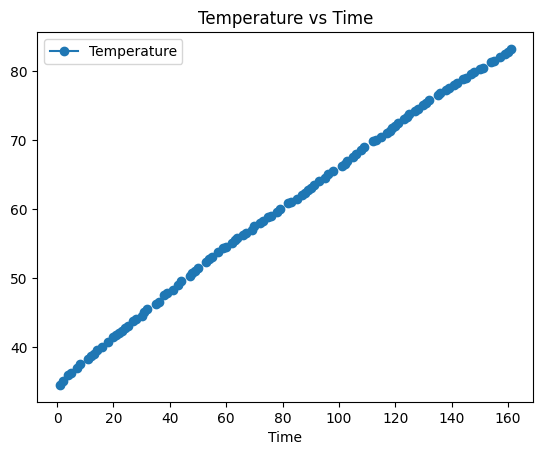

In [ ]:
df.plot(x='Time',y='Temperature', kind='line', marker='o' )
plt.title('Temperature vs Time')
plt.show()
#the model is fairly linear so we use a linear regression model to find the missing datas

In [ ]:
x=df['Time']
y=df['Temperature']

df_clean=df.dropna(subset=['Temperature'])
df_dropped=df[df['Temperature'].isna()]
x_dropped=df_dropped[['Time']]
xdrop=x_dropped.values.reshape(-1,1)

#print(x_dropped)
#print(df_dropped.head())

known_y = df_clean['Temperature']
known_x = df_clean['Time']

#print(known_x)
X_train, X_test, Y_train, Y_test = train_test_split(known_x, known_y, test_size=0.2, random_state=11)
model = LinearRegression()
xarray=X_train.values.reshape(-1,1)
yarray=Y_train.values.reshape(-1,1)
model.fit(xarray,yarray)
xtest=X_test.values.reshape(-1,1)
ytest=Y_test.values.reshape(-1,1)
score = model.score(xtest,ytest)
print(score)

y_pred=model.predict(xdrop)
#print(y_pred)

df_new=df.copy()
df_new.loc[df_new['Temperature'].isna(),'Temperature'] = y_pred
print(df_new.head())

df_A = df_new[df_new['Condition'] == 'Condition A']
df_B = df_new[df_new['Condition'] == 'Condition B']
df_C = df_new[df_new['Condition'] == 'Condition C']
print(df_A.head())

0.9990518281909879
   Time  Temperature    Condition
0     1      34.5000  Condition A
1     2      35.1000  Condition A
2     3      36.6114  Condition A
3     4      36.0000  Condition A
4     5      36.2000  Condition A
   Time  Temperature    Condition
0     1      34.5000  Condition A
1     2      35.1000  Condition A
2     3      36.6114  Condition A
3     4      36.0000  Condition A
4     5      36.2000  Condition A


Text(0, 0.5, 'Temperature')

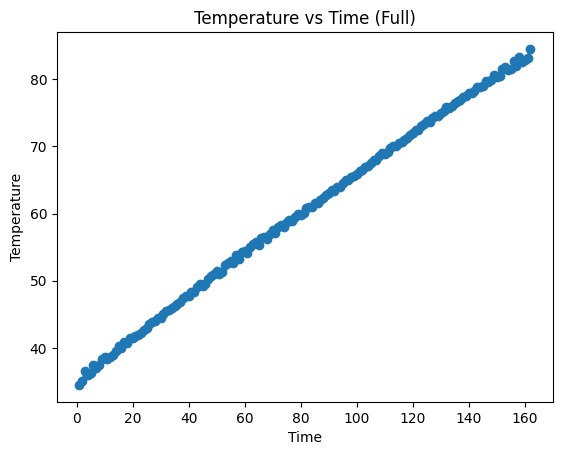

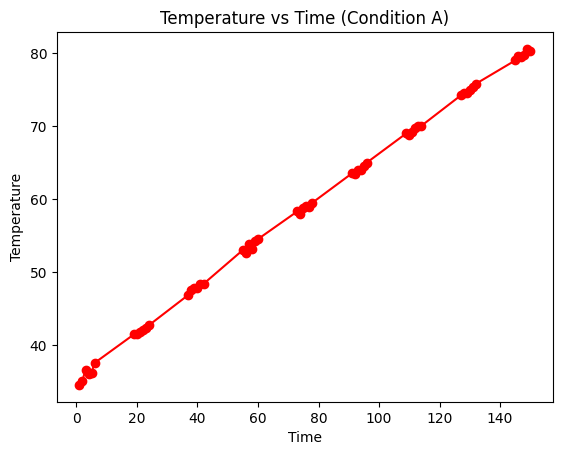

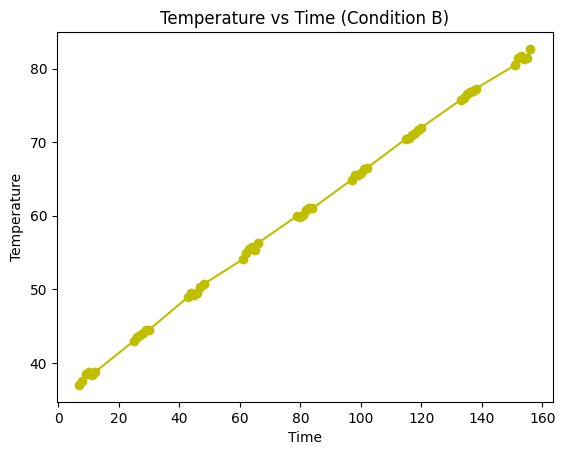

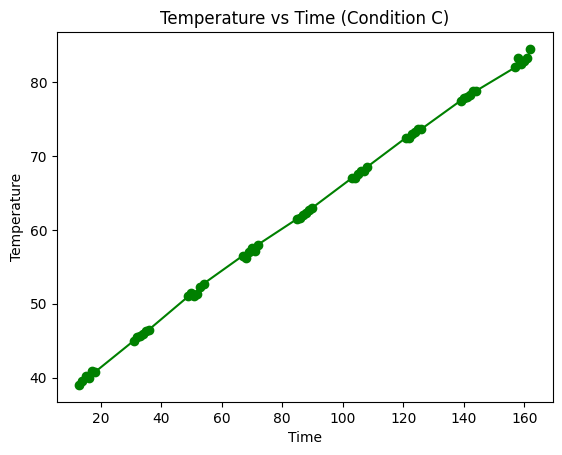

In [ ]:
plt.figure()
time=df_new['Time']
Temp=df_new['Temperature']
plt.subplot()
plt.plot(time,Temp,label='Temperature(full)',marker='o')
plt.title('Temperature vs Time (Full)')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.figure()
plt.subplot()
plt.plot(df_A['Time'],df_A['Temperature'],label='Temperature(Condition A)',color='r',marker='o')
plt.title('Temperature vs Time (Condition A)')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.figure()
plt.subplot()
plt.plot(df_B['Time'],df_B['Temperature'],label='Temperature(Condition B)',color='y',marker='o')
plt.title('Temperature vs Time (Condition B)')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.figure()
plt.subplot()
plt.plot(df_C['Time'],df_C['Temperature'],label='Temperature(Condition C)',color='g',marker='o')
plt.title('Temperature vs Time (Condition C)')
plt.xlabel('Time')
plt.ylabel('Temperature')



Text(0, 0.5, 'Temperature')

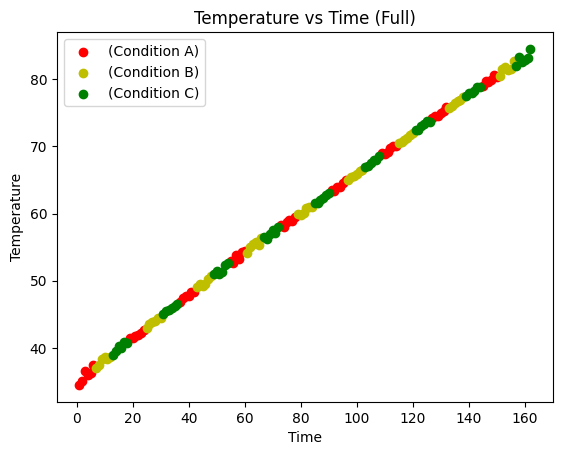

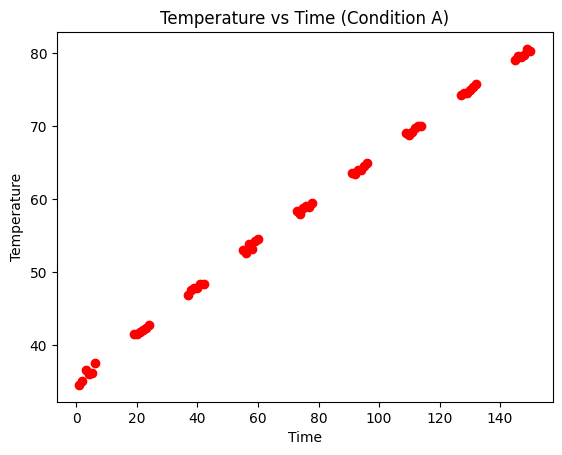

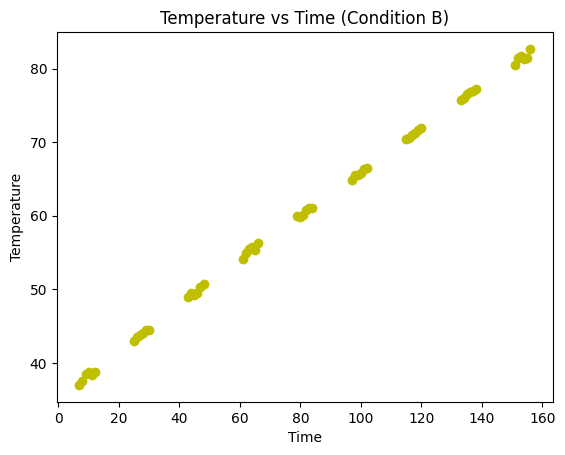

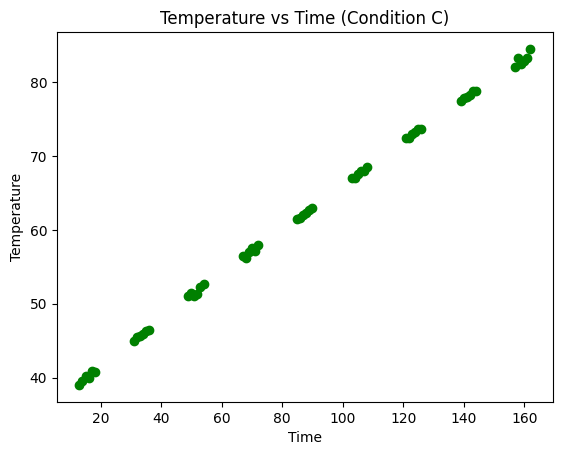

In [ ]:
#scatter plot
plt.figure()
plt.scatter(df_A['Time'],df_A['Temperature'],label='(Condition A)',color='r',marker='o')
plt.scatter(df_B['Time'],df_B['Temperature'],label='(Condition B)',color='y',marker='o')
plt.scatter(df_C['Time'],df_C['Temperature'],label='(Condition C)',color='g',marker='o')
plt.title('Temperature vs Time (Full)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

plt.figure()
plt.scatter(df_A['Time'],df_A['Temperature'],label='(Condition A)',color='r',marker='o')
plt.title('Temperature vs Time (Condition A)')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.figure()
plt.scatter(df_B['Time'],df_B['Temperature'],label='(Condition B)',color='y',marker='o')
plt.title('Temperature vs Time (Condition B)')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.figure()
plt.scatter(df_C['Time'],df_C['Temperature'],label='(Condition C)',color='g',marker='o')
plt.title('Temperature vs Time (Condition C)')
plt.xlabel('Time')
plt.ylabel('Temperature')

<function matplotlib.pyplot.legend(*args, **kwargs)>

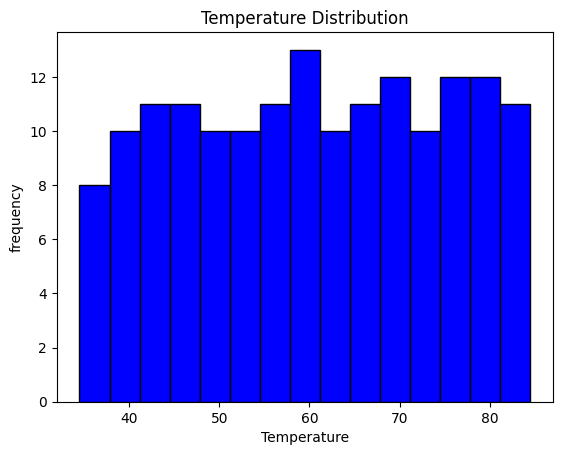

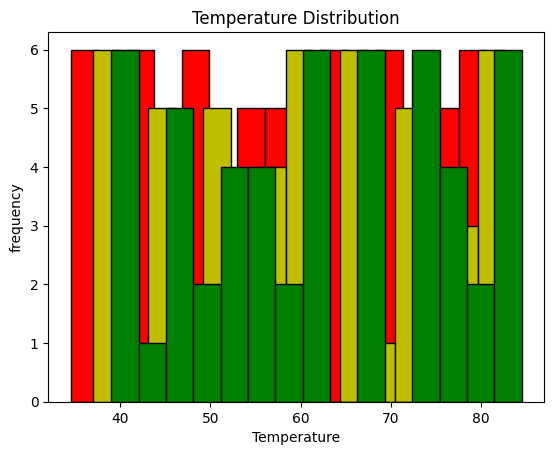

In [ ]:
#histogram
plt.figure()
plt.hist(Temp,bins=15,cumulative=False,color='b',edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('frequency')
plt.title('Temperature Distribution')

plt.figure()
plt.hist(df_A['Temperature'],bins=15,cumulative=False,label='Condition A',color='r',edgecolor='black')
plt.hist(df_B['Temperature'],bins=15,cumulative=False,label='Condition B',color='y',edgecolor='black')
plt.hist(df_C['Temperature'],bins=15,cumulative=False,label='Condition ',color='g',edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('frequency')
plt.title('Temperature Distribution')
plt.legend